In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(color_codes=True)

In [85]:
df_hotel = pd.read_csv('hotel_bookings.csv')
df_hotel = df_hotel.sample(5000)

In [86]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 79433 to 18031
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           5000 non-null   object 
 1   is_canceled                     5000 non-null   int64  
 2   lead_time                       5000 non-null   int64  
 3   arrival_date_year               5000 non-null   int64  
 4   arrival_date_month              5000 non-null   object 
 5   arrival_date_week_number        5000 non-null   int64  
 6   arrival_date_day_of_month       5000 non-null   int64  
 7   stays_in_weekend_nights         5000 non-null   int64  
 8   stays_in_week_nights            5000 non-null   int64  
 9   adults                          5000 non-null   int64  
 10  children                        5000 non-null   float64
 11  babies                          5000 non-null   int64  
 12  meal                         

In [87]:
df_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
79433,City Hotel,1,137,2016,January,5,27,0,2,1,...,Non Refund,29.0,NaN,45,Transient,70.00,0,0,Canceled,2015-10-27
23990,Resort Hotel,0,118,2016,May,19,2,2,5,2,...,No Deposit,95.0,NaN,0,Transient,69.40,0,0,Check-Out,2016-05-09
25385,Resort Hotel,0,192,2016,June,24,11,4,10,2,...,No Deposit,40.0,NaN,0,Contract,51.85,0,0,Check-Out,2016-06-25
94622,City Hotel,0,109,2016,August,32,4,0,3,2,...,No Deposit,9.0,NaN,0,Transient,176.25,1,1,Check-Out,2016-08-07
62674,City Hotel,1,29,2017,January,3,18,0,3,2,...,No Deposit,171.0,NaN,0,Transient-Party,65.00,0,0,Canceled,2016-12-20


In [88]:
df_hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
38484,Resort Hotel,0,154,2017,July,27,6,4,10,2,...,No Deposit,243.0,NaN,0,Contract,134.85,0,1,Check-Out,2017-07-20
30220,Resort Hotel,0,1,2016,November,47,16,0,1,1,...,No Deposit,196.0,NaN,0,Transient,60.00,0,0,Check-Out,2016-11-17
100760,City Hotel,0,27,2016,October,44,29,2,1,2,...,No Deposit,9.0,NaN,0,Transient,110.00,0,1,Check-Out,2016-11-01
36039,Resort Hotel,0,248,2017,May,18,3,1,4,2,...,No Deposit,242.0,NaN,0,Transient,54.00,0,1,Check-Out,2017-05-08
18031,Resort Hotel,0,8,2015,October,44,30,0,1,2,...,No Deposit,240.0,NaN,0,Transient-Party,48.00,0,2,Check-Out,2015-10-31


In [89]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

In [51]:
df_hotel['hotel'].value_counts()

City Hotel      3359
Resort Hotel    1641
Name: hotel, dtype: int64

<AxesSubplot:ylabel='hotel'>

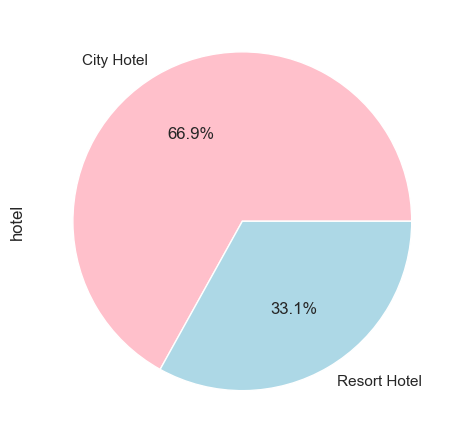

In [90]:
df_hotel['hotel'].value_counts().plot.pie(autopct='%1.1f%%', colors=['pink', 'lightblue'])

In [53]:
df_hotel.groupby(['hotel'])['arrival_date_year'].value_counts()

hotel         arrival_date_year
City Hotel    2016                 1600
              2017                 1142
              2015                  617
Resort Hotel  2016                  733
              2017                  544
              2015                  364
Name: arrival_date_year, dtype: int64

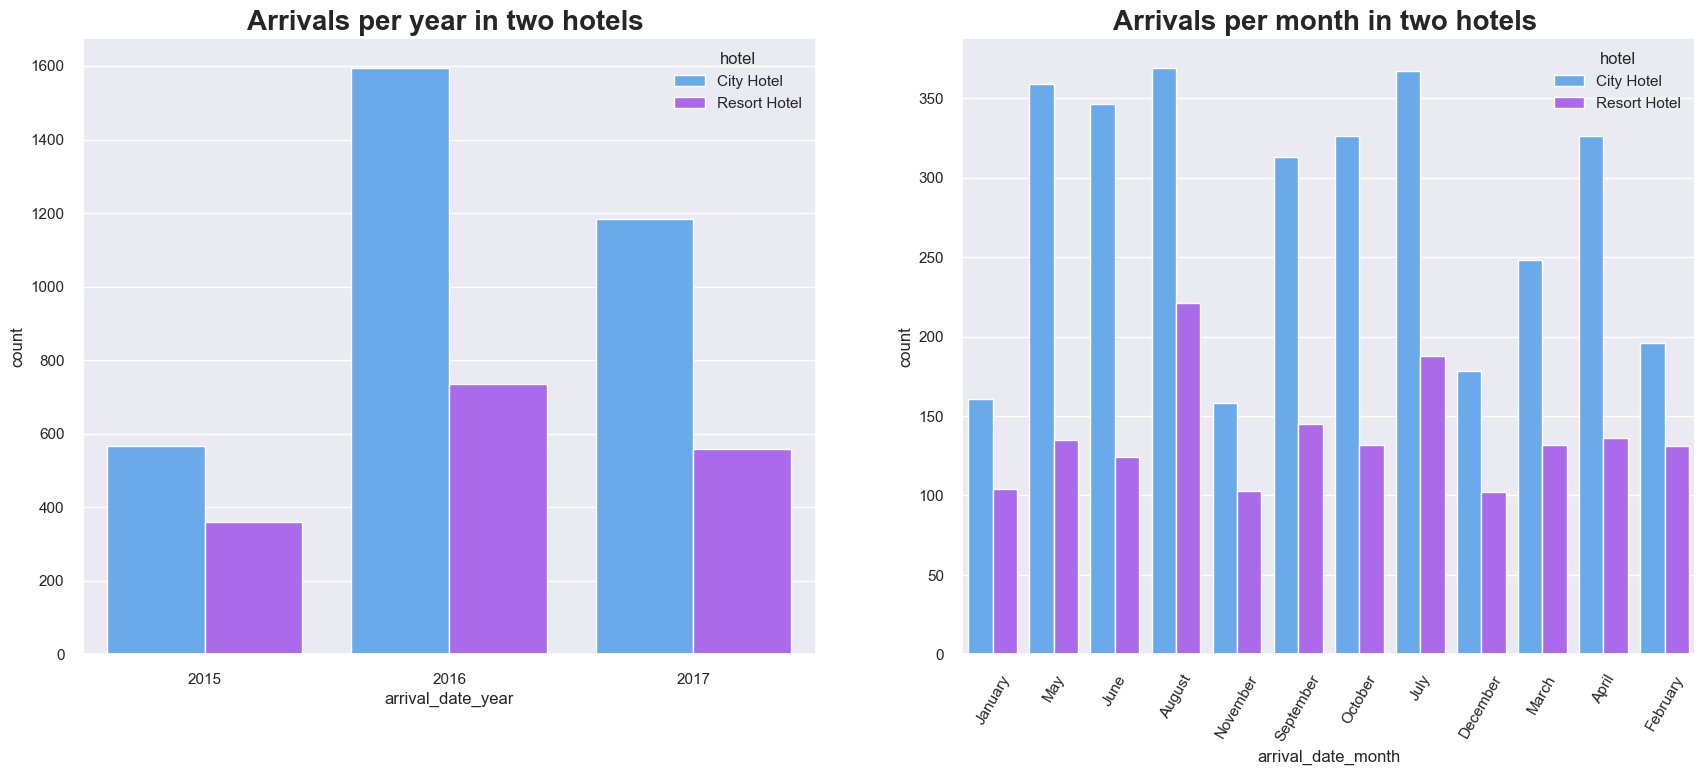

In [91]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(data=df_hotel, x='arrival_date_year', hue='hotel',palette='cool')
plt.title("Arrivals per year in two hotels ",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data=df_hotel, x='arrival_date_month', hue='hotel', palette='cool')
plt.title("Arrivals per month in two hotels ",fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.xticks(rotation=60)
plt.subplots_adjust(right=1.2)

plt.show()

<AxesSubplot:ylabel='is_canceled'>

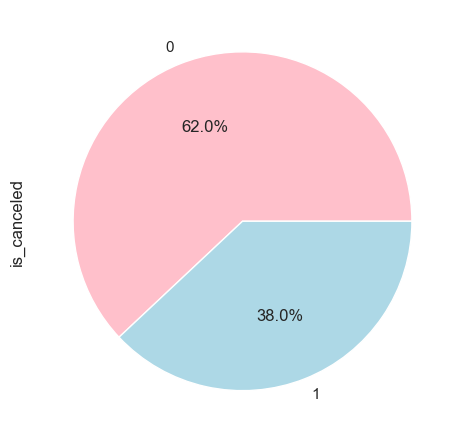

In [56]:
# Not canceled = 0, Canceled = 1
df_hotel['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%', colors=['pink', 'lightblue'])

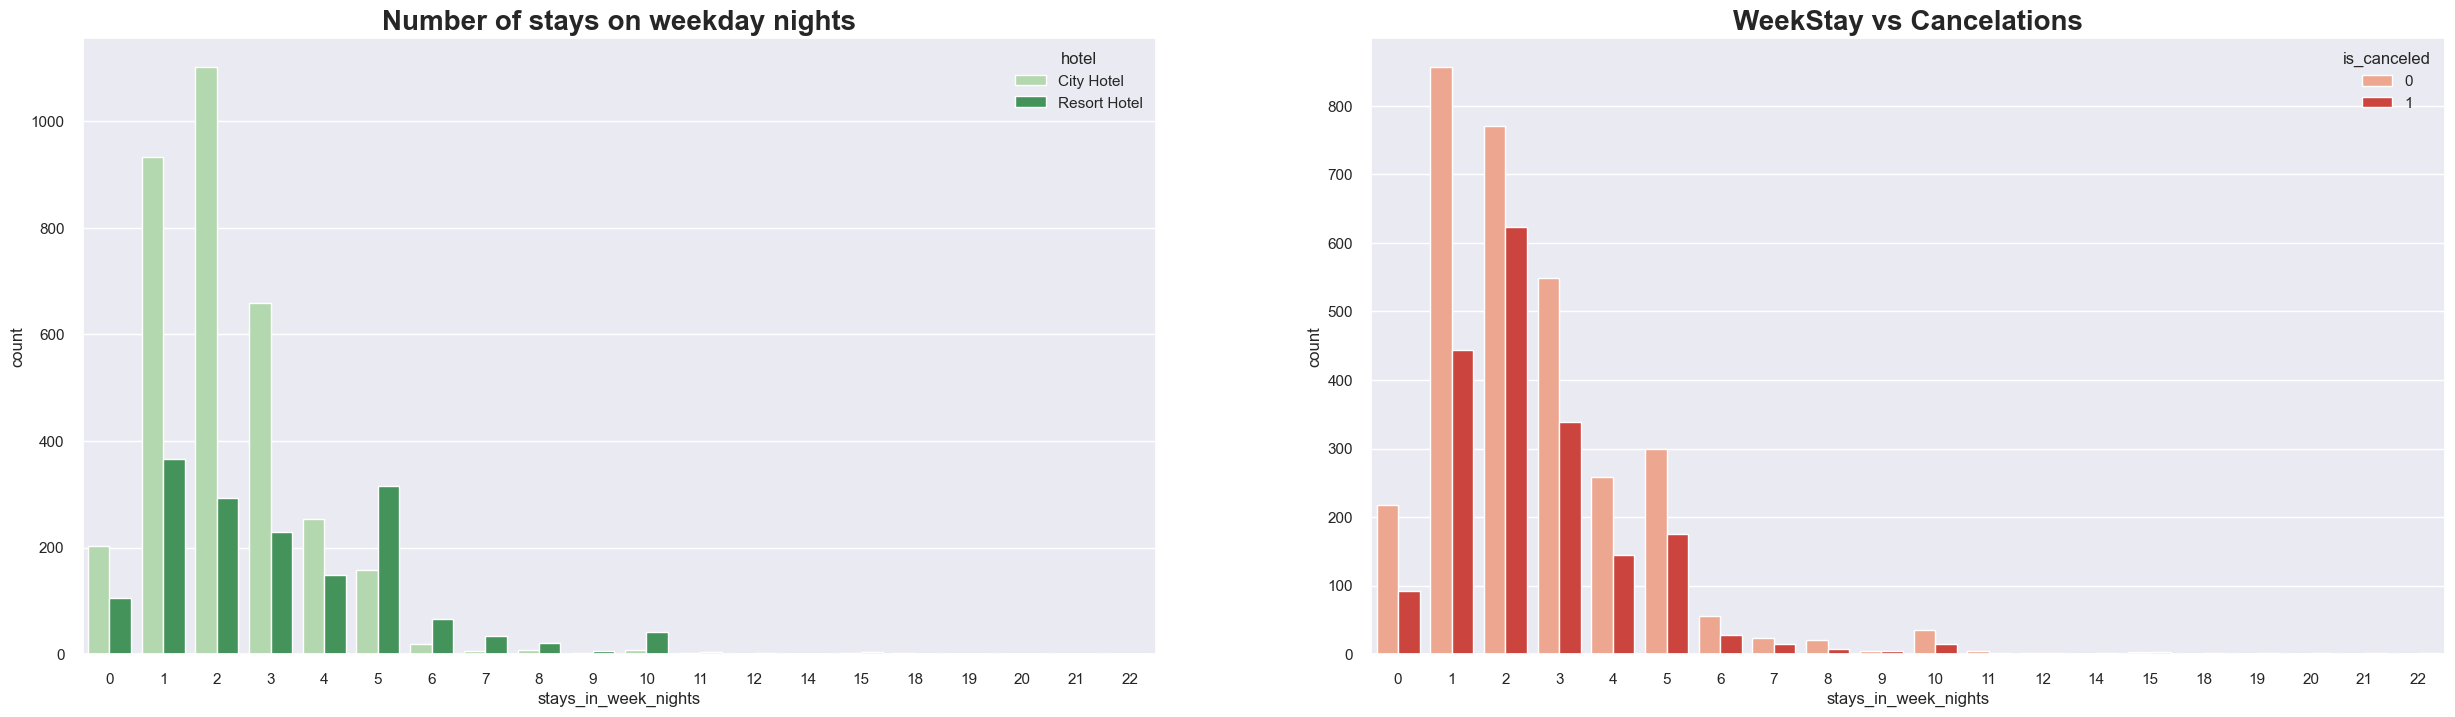

In [80]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_week_nights',hue='hotel', data=df_hotel, palette='Greens')
plt.title("Number of stays on weekday nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data = df_hotel, x='stays_in_week_nights', hue='is_canceled', palette='Reds')
plt.title('WeekStay vs Cancelations',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

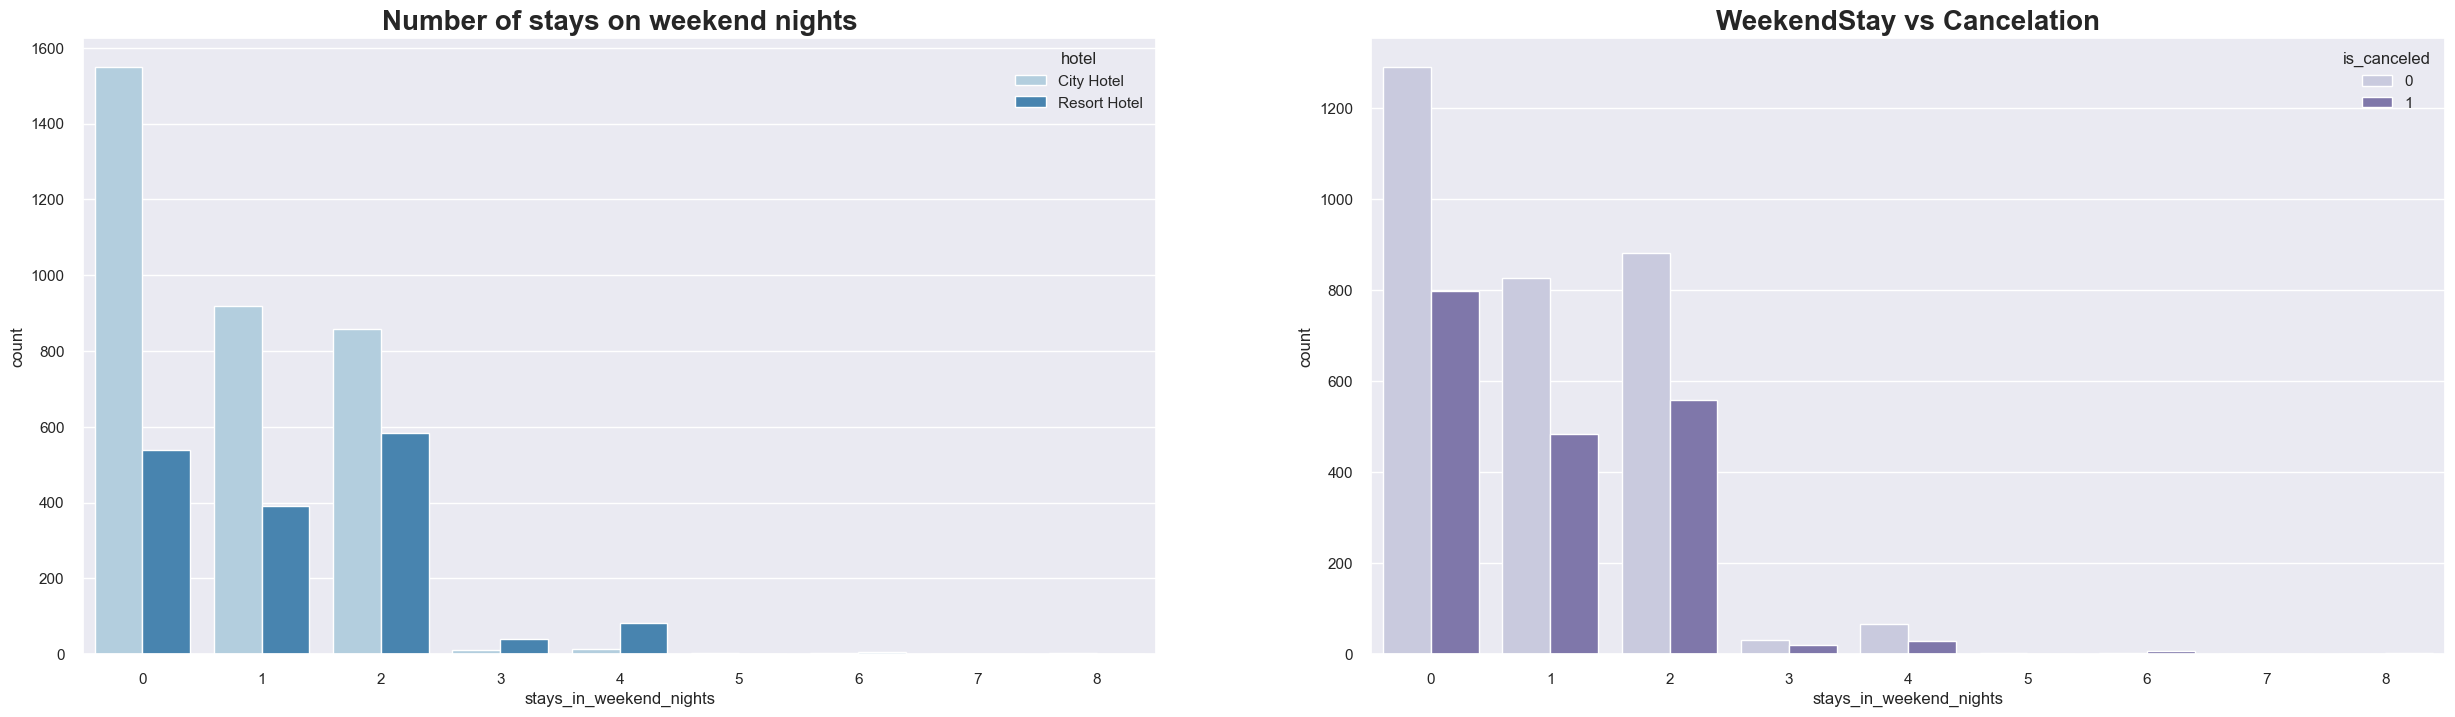

In [71]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='stays_in_weekend_nights',hue='hotel', data=df_hotel, palette='Blues')
plt.title("Number of stays on weekend nights",fontweight="bold", size=20)
plt.subplot(1, 2, 2)
sns.countplot(data=df_hotel, x = 'stays_in_weekend_nights', hue='is_canceled', palette='Purples')
plt.title('WeekendStay vs Cancelation',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

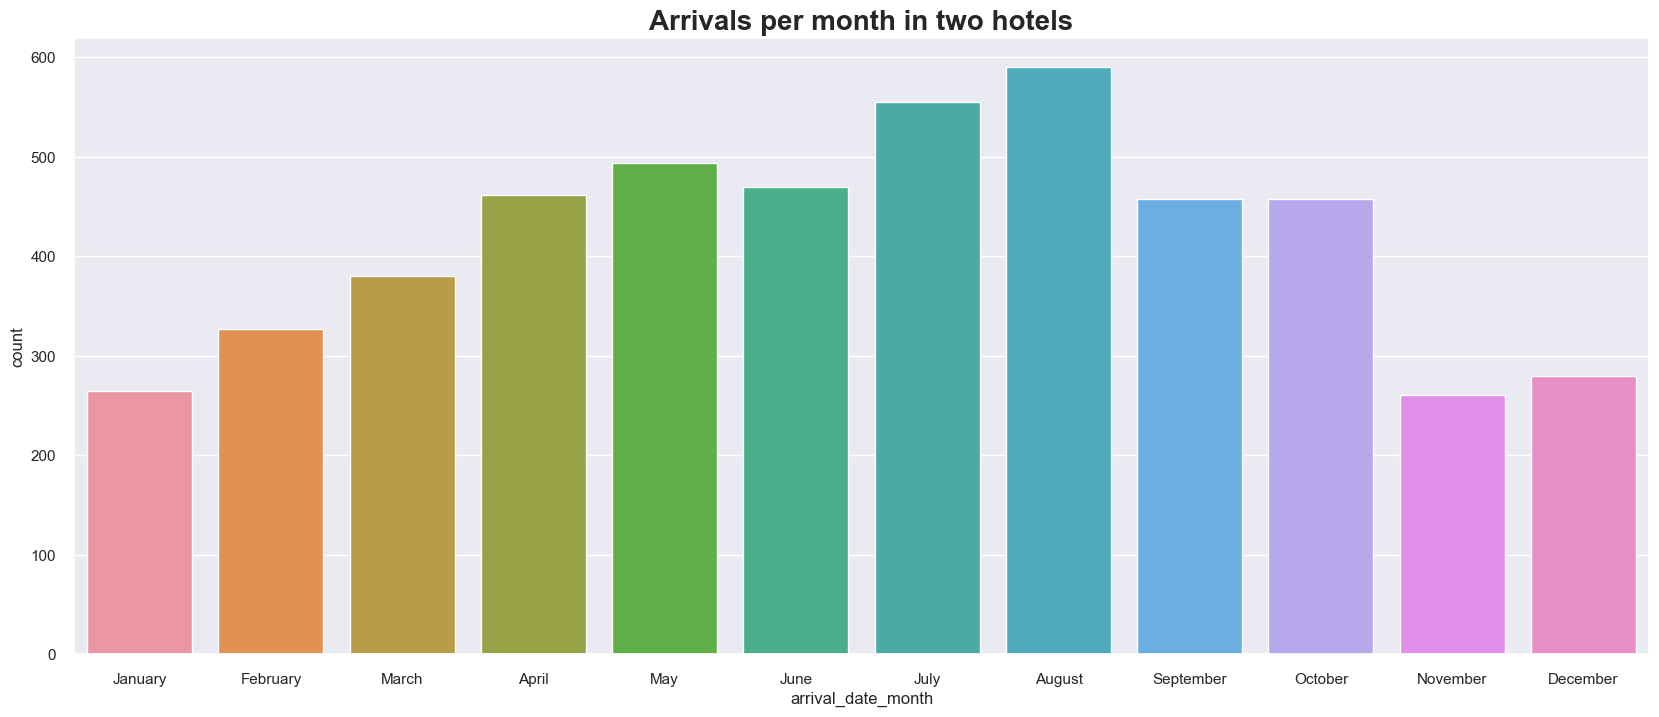

In [92]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_hotel, x='arrival_date_month', order=months )
plt.title('Arrivals per month in two hotels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)

Text(0.5, 1.0, 'Average Daily rate by months')

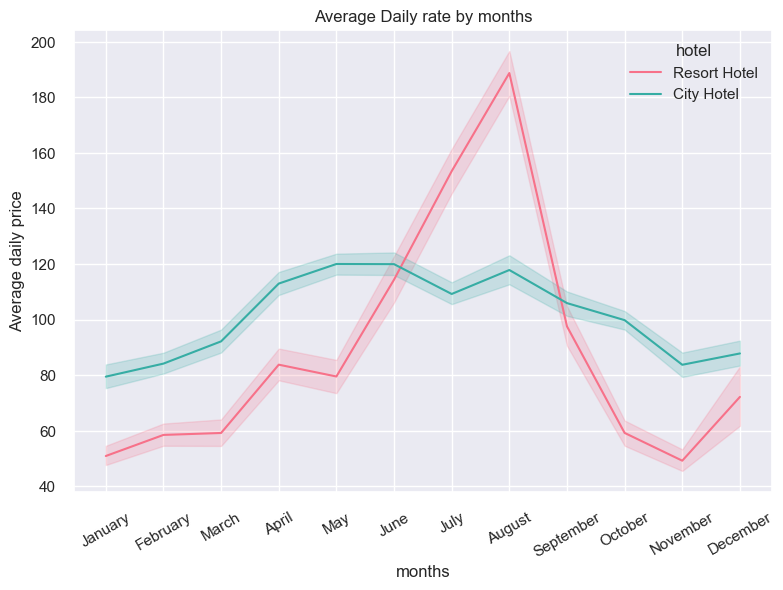

In [94]:
prices_mothly = df_hotel[['hotel', 'arrival_date_month', 'adr']].sort_values('arrival_date_month')
prices_mothly['arrival_date_month'] = pd.Categorical(prices_mothly["arrival_date_month"], categories=months, ordered=True)
plt.figure(figsize=(9,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data=prices_mothly, palette='husl')
plt.ylabel('Average daily price')
plt.xlabel('months')
plt.xticks(rotation=30)
plt.title('Average Daily rate by months')